# Worksheet 08

### Topics

- Soft Clustering
- Clustering Aggregation

### Probability Review

Read through [the following](https://medium.com/@gallettilance/overview-of-probability-3272b72c82c8)

### Soft Clustering

We generate 10 data points that come from a normal distribution with mean 5 and variance 1.

In [2]:
import random
import numpy as np
from sklearn.cluster import KMeans

mean = 5
stdev = 1

s1 = np.random.normal(mean, stdev, 10).tolist()
print(s1)

[5.605741473625193, 4.376658810797787, 4.3438504259126205, 4.79075490379473, 4.7379773103180804, 5.234553409050118, 5.404592432837601, 4.379572616288143, 3.591428210571264, 4.308478936163806]


a) Generate 10 more data points, this time coming from a normal distribution with mean 8 and variance 1.

In [3]:
s2 = np.random.normal(8, 1, 10).tolist()
print(s2)

[7.8235703771678775, 7.997803180114133, 7.1625628521013684, 8.018632016002318, 8.16162189917966, 10.17652058178643, 7.688862184104205, 9.297904520252223, 6.681109591740157, 7.315165996705611]


b) Flip a fair coin 10 times. If the coin lands on H, then pick the last data point of `c1` and remove it from `c1`, if T then pick the last data point from `c2` and remove it from `c2`. Add these 10 points to a list called `data`.

In [4]:
data = []
for i in range(10):
    # flip coin
    coin_output = random.choice([0, 1])
    if coin_output == 0:
        p1 = s1.pop()
        data.append(p1)
    else:
        p2 = s2.pop()
        data.append(p2)
print(data)

[4.308478936163806, 3.591428210571264, 7.315165996705611, 6.681109591740157, 9.297904520252223, 4.379572616288143, 7.688862184104205, 10.17652058178643, 8.16162189917966, 5.404592432837601]


c) This `data` is a Gaussian Mixture Distribution with 2 mixture components. Over the next few questions we will walk through the GMM algorithm to see if we can uncover the parameters we used to generate this data. First, please list all these parameters of the GMM that created `data` and the values we know they have.

Random pick = 0.5

Mean and variance of the first distribution = 5, 1

Mean and variance of the second distribution = 8, 1

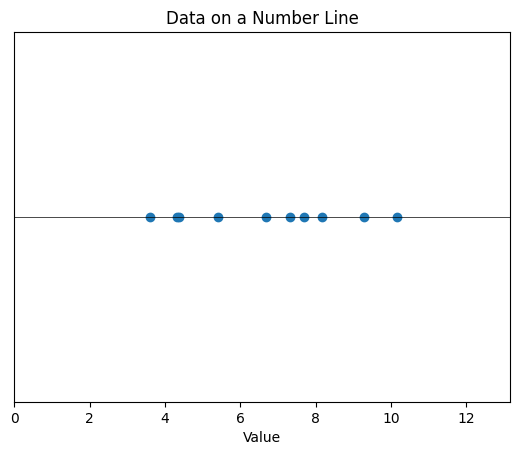

In [5]:
# Display the points on a 1d line without a y-axis
import matplotlib.pyplot as plt

plt.scatter(data, [0]*len(data), marker='o')  
plt.yticks([])  
# Manually set the range for the x-axis
plt.axhline(y=0, color='black', linewidth=0.5)  # Adds a horizontal line at y=0
plt.xlim([0, max(data)+3])
plt.xlabel("Value")
plt.title("Data on a Number Line")
plt.show()


d) Let's assume there are two mixture components (note: we could plot the data and make the observation that there are two clusters). The EM algorithm asks us to start with a random `mean_j`, `variance_j`, `P(S_j)` for each component j. One method we could use to find sensible values for these is to apply K means with k=2 here.

1. the centroids would be the estimates of the `mean_j`
2. the intra-cluster variance could be the estimate of `variance_j`
3. the proportion of points in each cluster could be the estimate of `P(S_j)`

Go through this process and list the parameter estimates it gives. Are they close or far from the true values?

In [6]:
kmeans = KMeans(2, init='k-means++').fit(X=np.array(data).reshape(-1, 1))

s1 = [x[0] for x in filter(lambda x: x[1] == 0, zip(data, kmeans.labels_))]
print(s1)
s2 = [x[0] for x in filter(lambda x: x[1] == 1, zip(data, kmeans.labels_))]
print(s2)

prob_s = [ len(s1) / (len(s1) + len(s2)) , len(s2) / (len(s1) + len(s2)) ]
mean = [ sum(s1)/len(s1) , sum(s2)/len(s2) ]
var = [ sum(map(lambda x : (x - mean[0])**2, s1)) / len(s1) , sum(map(lambda x : (x - mean[1])**2, s2)) / len(s2) ]

print("P(S_1) = " + str(prob_s[0]) + ",  P(S_2) = " + str(prob_s[1]))
print("mean_1 = " + str(mean[0]) + ",  mean_2 = " + str(mean[1]))
print("var_1 = " + str(var[0]) + ",  var_2 = " + str(var[1]))

c:\Users\kmfoc\My Drive\BU Files\BU Masters\Work\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[4.308478936163806, 3.591428210571264, 4.379572616288143, 5.404592432837601]
[7.315165996705611, 6.681109591740157, 9.297904520252223, 7.688862184104205, 10.17652058178643, 8.16162189917966]
P(S_1) = 0.4,  P(S_2) = 0.6
mean_1 = 4.421018048965204,  mean_2 = 8.220197462294715
var_1 = 0.417505161094091,  var_2 = 1.4103790586779636


They are somewhat close to the true values of (5, 1) and (8, 1), but not exactly the same. Especially the variances are off

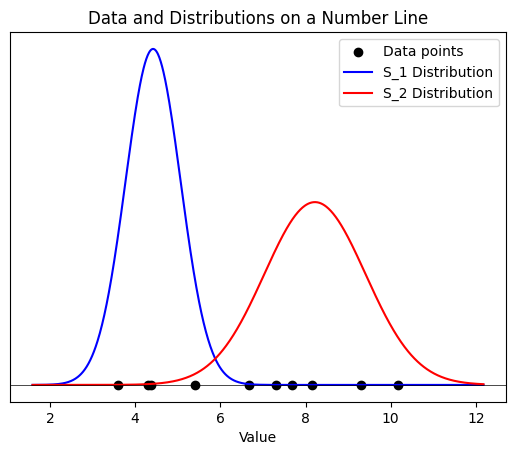

In [7]:
from scipy.stats import norm

# Generate a range of x values
x = np.linspace(min(data) - 2, max(data) + 2, 1000)

# Plot data points on a number line
plt.scatter(data, [0]*len(data), marker='o', color='black', label='Data points')

# Plot the normal distribution for S_1
plt.plot(x, norm.pdf(x, mean[0], np.sqrt(var[0])), label='S_1 Distribution', color='blue')

# Plot the normal distribution for S_2
plt.plot(x, norm.pdf(x, mean[1], np.sqrt(var[1])), label='S_2 Distribution', color='red')

# Additional plot settings
plt.axhline(y=0, color='black', linewidth=0.5)
plt.yticks([])
plt.xlabel("Value")
plt.title("Data and Distributions on a Number Line")
plt.legend()

plt.show()

e) For each data point, compute `P(S_j | X_i)`. Comment on which cluster you think each point belongs to based on the estimated probabilities. How does that compare to the truth?

In [8]:
from scipy.stats import norm

prob_s0_x = [] # P(S_0 | X_i)
prob_s1_x = [] # P(S_1 | X_i)
prob_x = [] # P(X_i)

k = 2

for p in data:
    print("point = ", p)
    pdf_i = []

    for j in range(k):
        # P(X_i | S_j)
        pdf_i.append(norm.pdf(p, mean[j], var[j]))
        print("probability of observing that point if it came from cluster " + str(j) + " = ", pdf_i[j])
        # P(S_j) already computed
        prob_s[j]

    # P(X_i) = P(S_0)P(X_i | S_0) + P(S_1)P(X_i | S_1)
    prob_x = prob_s[0] * pdf_i[0] + prob_s[1] * pdf_i[1]

    # P(S_j | X_i) = P(X_i | S_j)P(S_j) / P(X_i)
    prob_s0_x.append(pdf_i[0] * prob_s[0] / prob_x)
    prob_s1_x.append(pdf_i[1] * prob_s[1] / prob_x)

probs = zip(data, prob_s0_x, prob_s1_x)
for p in probs:
    print(p[0])
    print("Probability of coming from S_1 = " + str(p[1]))
    print("Probability of coming from S_2 = " + str(p[2]))
    print()


point =  4.308478936163806
probability of observing that point if it came from cluster 0 =  0.9214478031905182
probability of observing that point if it came from cluster 1 =  0.006042052558038419
point =  3.591428210571264
probability of observing that point if it came from cluster 0 =  0.13270875399811277
probability of observing that point if it came from cluster 1 =  0.0012961740490501253
point =  7.315165996705611
probability of observing that point if it came from cluster 0 =  3.513482869539992e-11
probability of observing that point if it came from cluster 1 =  0.2302286141130145
point =  6.681109591740157
probability of observing that point if it came from cluster 0 =  4.1394640017478476e-07
probability of observing that point if it came from cluster 1 =  0.15595006970936656
point =  9.297904520252223
probability of observing that point if it came from cluster 0 =  2.245547018166616e-30
probability of observing that point if it came from cluster 1 =  0.21124405111275824
point =

f) Having computed `P(S_j | X_i)`, update the estimates of `mean_j`, `var_j`, and `P(S_j)`. How different are these values from the original ones you got from K means? briefly comment.

In [9]:
prob_c = [sum(prob_s0_x)/ len(prob_s0_x), sum(prob_s1_x)/ len(prob_s1_x)]
mean = [sum([x[0] * x[1] for x in zip(prob_s0_x, data)]) / sum(prob_s0_x), sum([x[0] * x[1] for x in zip(prob_s1_x, data)]) / sum(prob_s1_x)]
var = [sum([(x[0] - mean[0])**2 * x[1] for x in zip(data, prob_s0_x)]) / sum(prob_s0_x), sum([(x[0] - mean[1])**2 * x[1] for x in zip(data, prob_s1_x)]) / sum(prob_s1_x)]

print("P(S_1) = " + str(prob_s[0]) + ",  P(S_2) = " + str(prob_s[1]))
print("mean_1 = " + str(mean[0]) + ",  mean_2 = " + str(mean[1]))
print("var_1 = " + str(var[0]) + ",  var_2 = " + str(var[1]))

P(S_1) = 0.4,  P(S_2) = 0.6
mean_1 = 4.285379167908636,  mean_2 = 7.985269958040416
var_1 = 0.3224028671799074,  var_2 = 1.9341466431040992


In [10]:
import imageio
import os

threshold = 1e-8  # Convergence criterion
max_iter = 1000  # To avoid infinite loop in case EM doesn't converge
iter_count = 0
log_likelihoods = []
images = []


while iter_count < max_iter:
    # E-Step
    prob_s0_x = []  # P(S_0 | X_i)
    prob_s1_x = []  # P(S_1 | X_i)
    
    current_log_likelihood = 0
    
    for p in data:
        pdf_i = [norm.pdf(p, mean[j], np.sqrt(var[j])) for j in range(k)]
        prob_x = sum([prob_s[j] * pdf_i[j] for j in range(k)])
        current_log_likelihood += np.log(prob_x)
        
        prob_s0_x.append(pdf_i[0] * prob_s[0] / prob_x)
        prob_s1_x.append(pdf_i[1] * prob_s[1] / prob_x)
    
    # M-Step
    prob_s = [sum(prob_s0_x) / len(data), sum(prob_s1_x) / len(data)]
    mean = [sum([x[0] * x[1] for x in zip(prob_s0_x, data)]) / sum(prob_s0_x), 
            sum([x[0] * x[1] for x in zip(prob_s1_x, data)]) / sum(prob_s1_x)]
    var = [sum([(x[0] - mean[0])**2 * x[1] for x in zip(data, prob_s0_x)]) / sum(prob_s0_x), 
           sum([(x[0] - mean[1])**2 * x[1] for x in zip(data, prob_s1_x)]) / sum(prob_s1_x)]
    
    if len(log_likelihoods) > 1:
        print(np.abs(current_log_likelihood - log_likelihoods[-1]))
        if np.abs(current_log_likelihood - log_likelihoods[-1]) < threshold:
            break
    
    log_likelihoods.append(current_log_likelihood)

    # Plotting
    colors = [(1-p, 0, p) for p in prob_s0_x]
    x = np.linspace(min(data) - 2, max(data) + 2, 1000)
    
    fig, ax = plt.subplots()
    ax.scatter(data, [0]*len(data), marker='o', c=colors)
    ax.plot(x, norm.pdf(x, 5, 1), color='purple')
    ax.plot(x, norm.pdf(x, mean[0], np.sqrt(var[0])), color='blue')
    ax.plot(x, norm.pdf(x, 8, 1), color='pink')
    ax.plot(x, norm.pdf(x, mean[1], np.sqrt(var[1])), color='red')

    
    ax.axhline(y=0, color='black', linewidth=0.5)
    ax.set_yticks([])
    ax.set_xlabel("Value")
    ax.set_title(f"EM Iteration {iter_count + 1}")


    # Save the plot to a file
    fname = f"tmp_plot_{iter_count}.png"
    fig.savefig(fname)
    images.append(imageio.imread(fname))
    # delete the fig after saving by using fname
    os.remove(fname)
    plt.close()
    iter_count += 1

print(len(images))
imageio.mimsave('em_animation.gif', images, duration=0.5)

C:\Users\kmfoc\AppData\Local\Temp\ipykernel_252748\1830903584.py:61: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(fname))


0.0006730693944874133
0.0005433962000012116
0.000502222108739403
0.00047732739923844747
0.0004639919858391295
0.0004609495955882892
0.0004678685300802954
0.0004851881311402906
0.0005141647334703237
0.0005570471317817294
0.0006174158704759236
0.0007007679414492429
0.0008155001245029325
0.0009745730399117747
0.0011983813625420225
0.0015198290785853885
0.00199354576295363
0.0027130312961602954
0.003842999133127023
0.005679508537223654
0.008751090735142242
0.013921925580479666
0.022120977000753328
0.03213410132931216
0.03518271482827373
0.021435291767549103
0.0057140563807500655
0.0007716601898941633
9.082631759582682e-05
1.3248827968936894e-05
2.303191891428469e-06
4.2889787721378525e-07
8.154909281188338e-08
1.559676832130208e-08
2.9879352325679065e-09
36


Variance of 1 is better but of 2 is worse, both means are worse, but the probabilities are better

g) Update `P(S_j | X_i)`. Comment on any differences or lack thereof you observe

In [ ]:
# Update P(S_j|X_i)
prob_s0_x, prob_s1_x = [], []
for p in data:
    pdf_i = [norm.pdf(p, mean[j], np.sqrt(var[j])) for j in range(k)]
    prob_x_i = sum([prob_s[j] * pdf_i[j] for j in range(k)])

    prob_s0_x.append(pdf_i[0] * prob_s[0] / prob_x_i)
    prob_s1_x.append(pdf_i[1] * prob_s[1] / prob_x_i)

prob_s = [sum(prob_s0_x) / len(prob_s0_x), sum(prob_s1_x) / len(prob_s1_x)]
mean = [sum([x[0] * x[1] for x in zip(prob_s0_x, data)]) / sum(prob_s0_x),
        sum([x[0] * x[1] for x in zip(prob_s1_x, data)]) / sum(prob_s1_x)]
var = [sum([(x[0] - mean[0]) ** 2 * x[1] for x in zip(data, prob_s0_x)]) / sum(prob_s0_x),
       sum([(x[0] - mean[1]) ** 2 * x[1] for x in zip(data, prob_s1_x)]) / sum(prob_s1_x)]

print("Updated Values after 1 iteration:")
print("P(S_1) =", prob_s[0], ", P(S_2) =", prob_s[1])
print("mean_1 =", mean[0], ", mean_2 =", mean[1])
print("var_1 =", var[0], ", var_2 =", var[1])

Mean2 is better than  the last iteration, but Mean1 is worse than the last iteration,both variances are slightly better. P(S1) and P(S2) are worse than the last iteration.

h) Use `P(S_j | X_i)` to create a hard assignment - label each point as belonging to a specific cluster (0 or 1)

In [ ]:
labels = [0 if prob_s0 > prob_s1 else 1 for prob_s0, prob_s1 in zip(prob_s0_x, prob_s1_x)]

for i, label in enumerate(labels):
    print(f"Data point {data[i]:.2f} is assigned to cluster {label}")
